In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/DELL/Documents/datasets/insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
non_smoker_df = df[df.smoker == 'no']


In [5]:
model = LinearRegression()

In [36]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [7]:
model.fit(inputs,targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
model.predict(np.array([
    [23],
    [37],
    [61]]
))

c:\Users\DELL\.vscode\Main\.venv310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [9]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [10]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [11]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [12]:
rmse(targets,predictions)

np.float64(4662.505766636395)

In [13]:
model.coef_

array([267.24891283])

In [14]:
model.intercept_

np.float64(-2091.4205565650864)

In [15]:
def estimate_charges(age,w,b):
    return w * age + b


In [16]:
def try_parameters(w,b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages,target, s=8, alpha=0.9)
    plt.xlabel('ages')
    plt.ylabel('charges')
    plt.legend(['Estimate', 'Actual'])

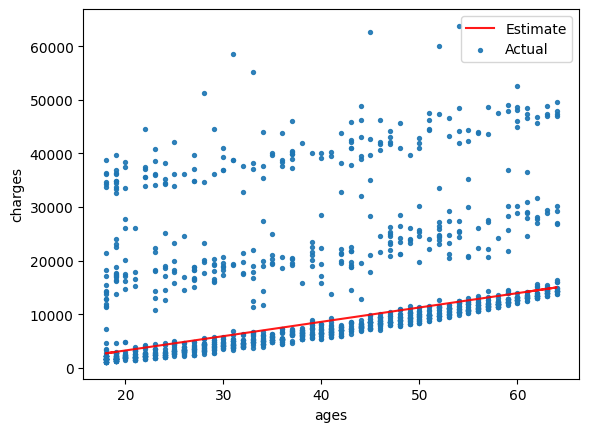

In [17]:
try_parameters(model.coef_,model.intercept_)

In [21]:
inputs,targets = df[['age','bmi','children']], df['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
loss


np.float64(11355.317901125973)

In [23]:
px.scatter(df, x='age', y='charges', color='smoker')